### 1. Load and Explore the Data

In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Test.csv')

# Display the first few rows
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   E

### 2. Data Preprocessing

In [45]:
# Drop duplicates if any
data = data.drop_duplicates()

# Handle missing values (example: drop rows with missing values)
data = data.dropna()

# Select relevant features for clustering
features = data[['Age', 'Work_Experience', 'Family_Size']]  # Adjust based on your dataset


### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### Determine the Number of Clusters

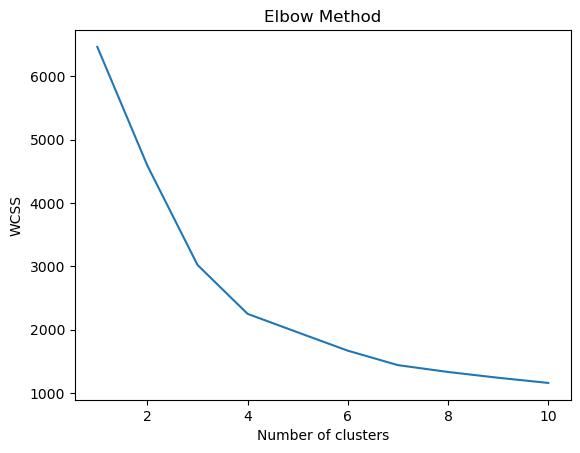

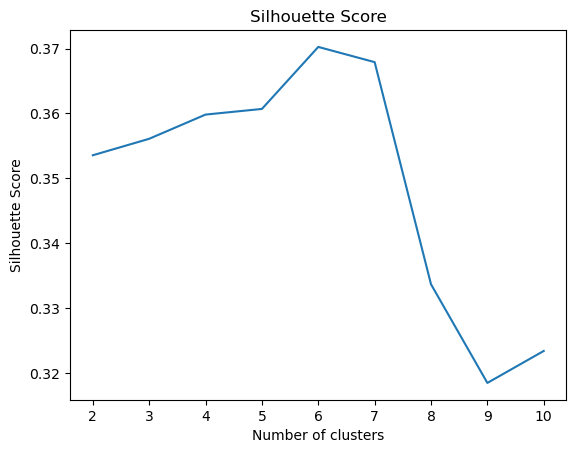

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(scaled_features)
    sil_scores.append(silhouette_score(scaled_features, labels))

plt.plot(range(2, 11), sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


### 5. Apply K-Means Clustering

In [55]:
# Apply K-Means with chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to the original data
data['Cluster'] = clusters


### 6. Analyze and Visualize the Results

Cluster
0    907
2    787
1    460
Name: count, dtype: int64
[[ 0.72380293 -0.49000101 -0.590645  ]
 [-0.39128284  1.69426458 -0.29148432]
 [-0.60546271 -0.42557915  0.85107726]]


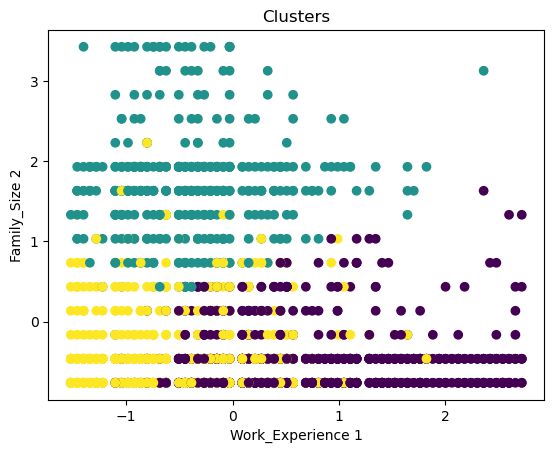

In [61]:
# Check the distribution of clusters
print(data['Cluster'].value_counts())

# View cluster centers
print(kmeans.cluster_centers_)

# Visualize clusters (example for 2D data)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Work_Experience 1')
plt.ylabel('Family_Size 2')
plt.title('Clusters')
plt.show()


We have specific columns or features in our customer_data.csv, we might need to adjust the feature selection step accordingly. For instance, if our dataset includes columns like age, income, Graduatated , Marrage  aa spending_score, we might focus on age, income, and spending_score for clustering